In [1]:
#Import libraries
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
#Import data
uso= pd.read_csv('data/uso_merged.csv')

In [3]:
#Adjust dataframe for political graphs
color_map = {'Democratic': 'blue', 'Republican': 'red'}
# Add a 'Color' column to the dataframe based on the 'Party' column
uso['Color']= uso['Party'].map(color_map)

In [4]:
#Sum of KG column by president
KG_summed = uso.groupby(['President', 'Party', 'Color'])['KG Equivalent'].sum().reset_index()

In [5]:
#To ensure graph shows the correct years
grp = uso.groupby(['Years In Office','President'])
party_grp=uso.groupby(['Party']).size().reset_index(name='Number of Seizures')

In [6]:
grp.Color.max().values

array(['blue', 'red', 'red', 'blue', 'red', 'blue', 'red'], dtype=object)

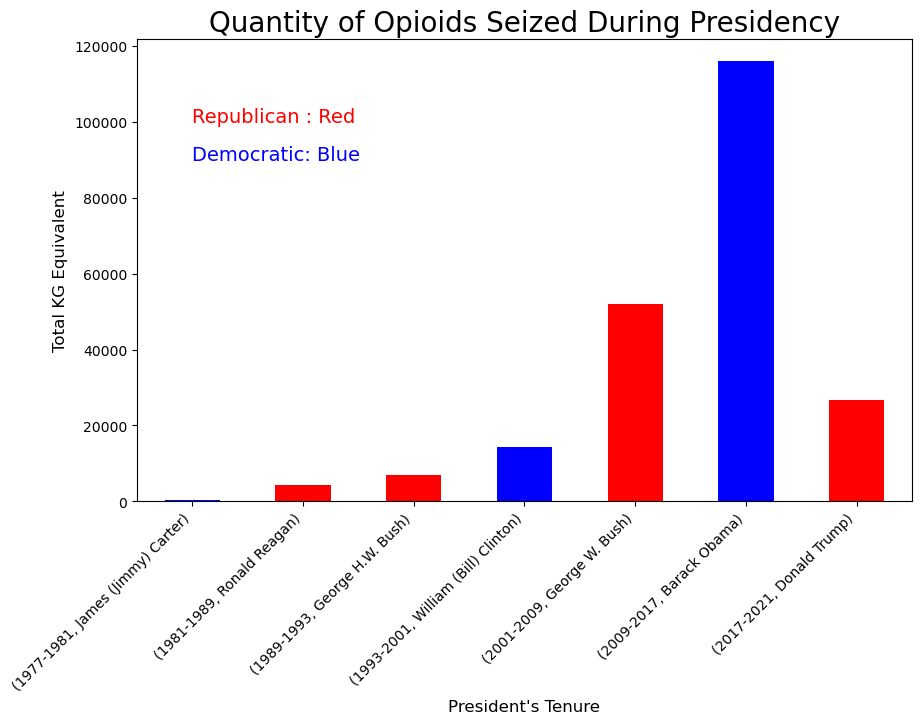

In [7]:
#Sum of KG column by president
grp['KG Equivalent'].sum().plot.bar(color=grp.Color.max().values, figsize=[10,6])
plt.annotate('Republican : Red', [0,100000], color='r', fontsize= 14)
plt.annotate('Democratic: Blue', [0,90000], color='b', fontsize=14)
plt.title('Quantity of Opioids Seized During Presidency', fontsize=20)
plt.ylabel('Total KG Equivalent', fontsize=12)
plt.xlabel("President's Tenure", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.savefig('USO_graphs/seizure_president.png', bbox_inches='tight')
plt.show()

In [8]:
seizures_count_by_presidency = uso.groupby('President').size().reset_index(name='Number of Seizures')
seizures_count_by_presidency_sorted = seizures_count_by_presidency.sort_values(by='Number of Seizures', ascending=False)

seizures_count_by_presidency_sorted

,President,Number of Seizures
0,Barack Obama,98
3,George W. Bush,46
6,William (Bill) Clinton,39
1,Donald Trump,31
5,Ronald Reagan,22
2,George H.W. Bush,13
4,James (Jimmy) Carter,4


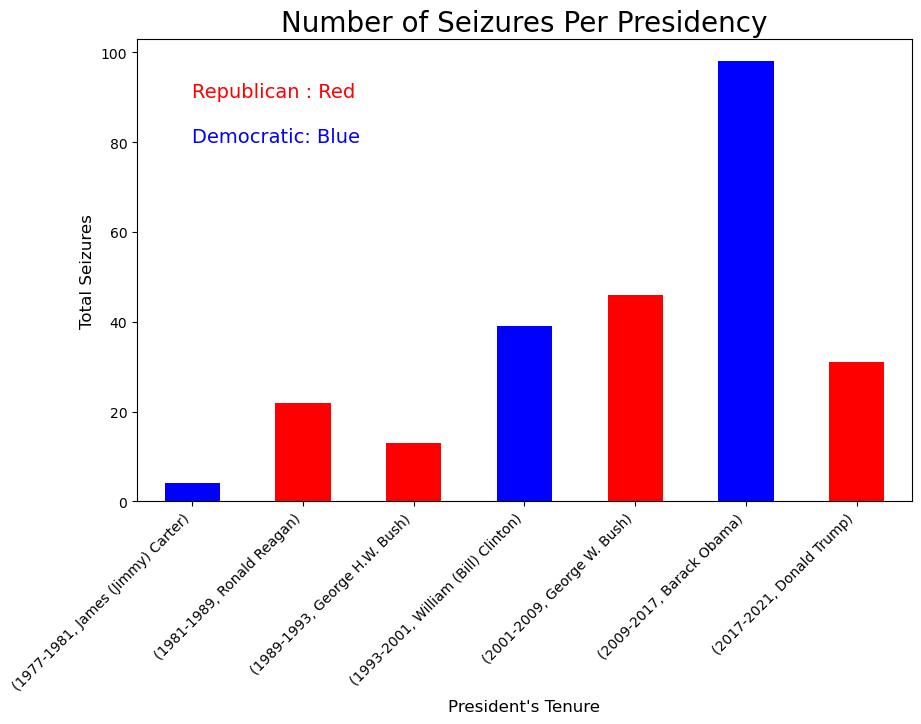

In [9]:
#Sum of KG column by president
grp['KG Equivalent'].count().plot.bar(color=grp.Color.max().values, figsize=[10,6],rot=45)
plt.annotate('Republican : Red', [0,90], color='r', fontsize= 14)
plt.annotate('Democratic: Blue', [0,80], color='b', fontsize=14)
plt.title('Number of Seizures Per Presidency', fontsize=20)
plt.ylabel('Total Seizures', fontsize=12)
plt.xlabel("President's Tenure", fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.savefig('USO_graphs/seizure_number_president.png', bbox_inches='tight')
plt.show()

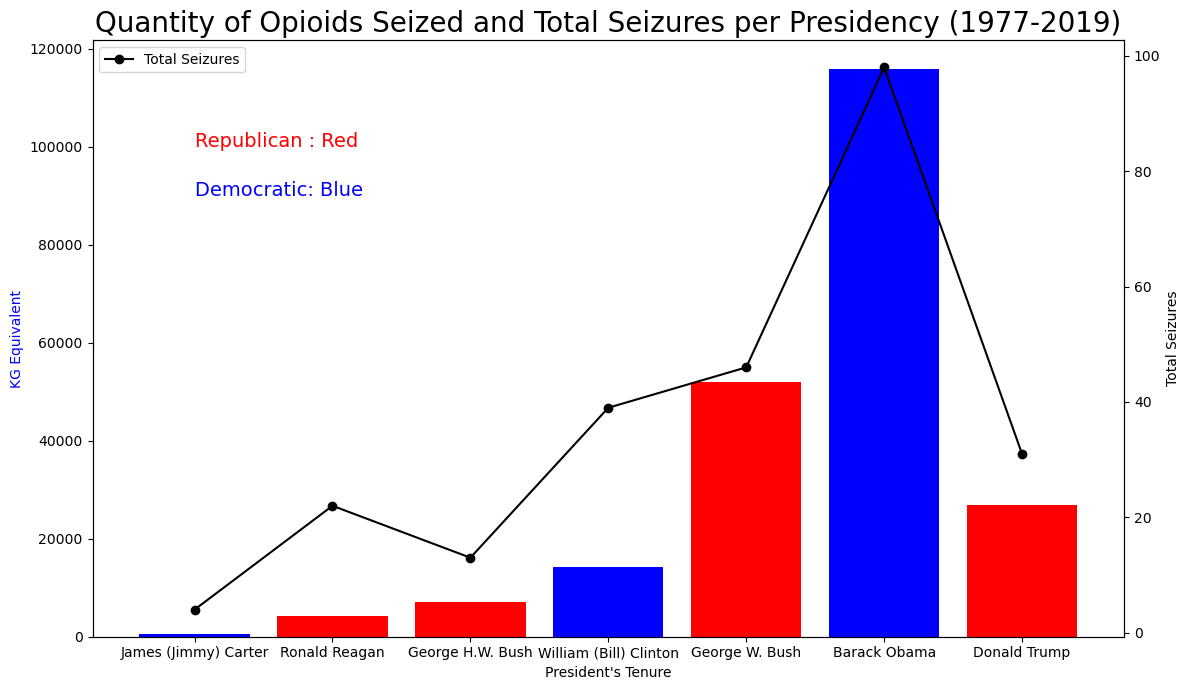

In [10]:
# Group by President and calculate total KG Equivalent and count the number of seizures
# Adding 'Years In Office' to sort the presidents chronologically
president_grouped = uso.groupby(['President', 'Years In Office'], as_index=False).agg({
    'KG Equivalent': 'sum',
    'Color': 'first',
})
president_grouped['Total Seizures'] = uso.groupby(['President', 'Years In Office']).size().values

# Sort the presidents by 'Years In Office'
president_grouped.sort_values('Years In Office', inplace=True)

# Plot
fig, ax1 = plt.subplots(figsize=[12,7])

# Bar plot for KG Equivalent
bars=ax1.bar(president_grouped['President'],president_grouped['KG Equivalent'], color=president_grouped['Color'])

# Get a twin axis
ax2 = ax1.twinx()

# Line plot for total seizures
line=ax2.plot(president_grouped['President'], president_grouped['Total Seizures'], marker='o', color='black')

ax1.annotate('Republican : Red', [0,100000], color='r', fontsize=14)
ax1.annotate('Democratic: Blue', [0,90000], color='b', fontsize=14)

ax1.set_xlabel("President's Tenure")
ax1.set_ylabel('KG Equivalent', color='blue')
ax2.set_ylabel('Total Seizures', color='black')

plt.title('Quantity of Opioids Seized and Total Seizures per Presidency (1977-2019)', fontsize=20)
plt.xticks(rotation=90)

# Create the legend
plt.legend(line,['Total Seizures'],loc='upper left')
plt.tight_layout()

# Save the figure
fig.savefig('USO_graphs/seizure_president_colored_with_total_seizures_chronological.png')

plt.show()

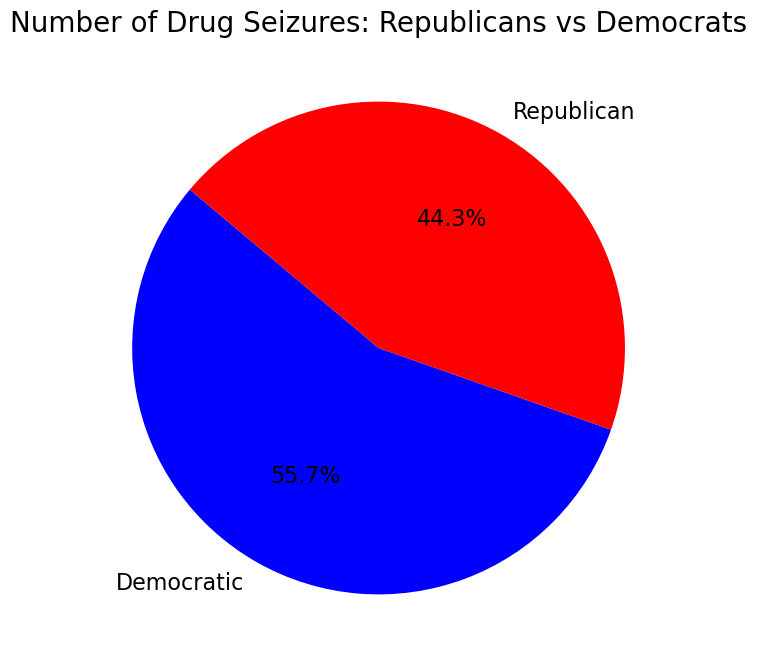

In [11]:
#Pie Chart

# Plot a pie chart
plt.figure(figsize=(8, 8))

plt.pie(party_grp['Number of Seizures'], labels=party_grp['Party'], autopct='%1.1f%%', startangle=140, colors=['blue', 'red'],textprops={'fontsize': 16})
plt.title('Number of Drug Seizures: Republicans vs Democrats', fontsize=20)

# Save the figure
plt.savefig('USO_graphs/pie_chart_republicans_vs_democrats.png')
plt.show()

In [12]:
uso_max_kg = uso.loc[uso['KG Equivalent'].idxmax()]
uso_max_kg

Unnamed: 0                       149
President               Barack Obama
Party                     Democratic
Year of Drug Seizure            2013
Years In Office            2009-2017
Drug                           Opium
KG Equivalent               38351.65
Color                           blue
Name: 149, dtype: object

In [13]:
uso['KG Equivalent'].mode()

0       1.0
1       2.0
2      13.0
3      14.0
4      41.0
5    1051.0
Name: KG Equivalent, dtype: float64

In [14]:
uso['KG Equivalent'].min()

0.0004

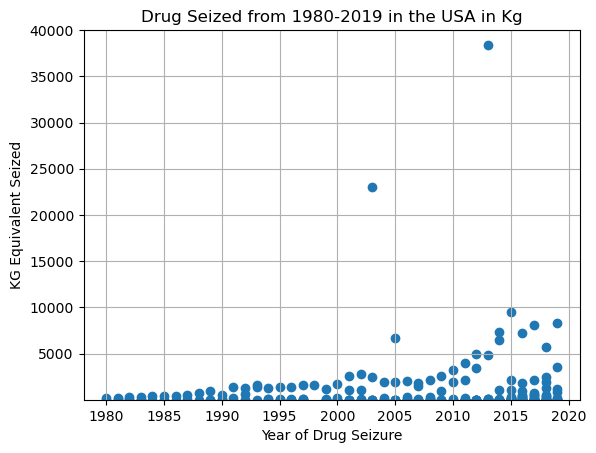

In [15]:
#Scatter Plot
plt.scatter(uso['Year of Drug Seizure'],uso['KG Equivalent'])
plt.title('Drug Seized from 1980-2019 in the USA in Kg')
plt.ylim(0.0004,40000)
plt.xlabel('Year of Drug Seizure')
plt.ylabel('KG Equivalent Seized')
plt.grid(True)
plt.savefig('USO_graphs/seizure_plotted.png')
plt.show()

/Users/michelleminkowitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michelleminkowitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michelleminkowitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/michelleminkowitz/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

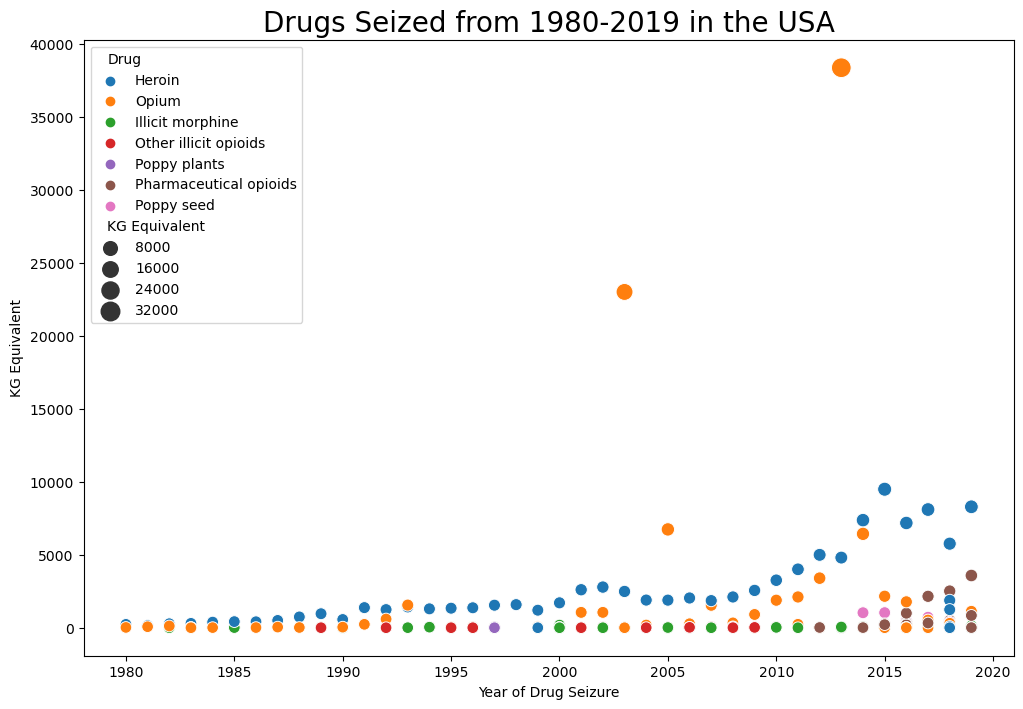

In [16]:

# Draw a scatter plot while assigning point colors and sizes to different variables in the dataset
plt.figure(figsize=(12, 8))
plt.title('Drugs Seized from 1980-2019 in the USA', fontsize=20)
ax = sns.scatterplot(x='Year of Drug Seizure', y='KG Equivalent',
                     hue='Drug', size='KG Equivalent',
                     sizes=(70, 200),
                     data=uso)
min_kg = uso['KG Equivalent'].min()
max_kg = uso['KG Equivalent'].max()
plt.savefig('USO_graphs/seizure_by_drug_plotted.png')
plt.show()